# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [2]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [3]:
# Data Cleaning
#Check how many nulls we have
df_flights.isnull().sum().sum()
df_flights.isnull().sum()


Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [4]:
#Filter to include only rows where any of the columns (Axis 1) are null.
df_flights[df_flights.isnull().any(axis=1)]
df_flights[df_flights.isnull().any(axis=1)][['DepDelay','DepDel15']]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


In [5]:
# Function to fill in missing values based on DepDelay
def fillNANs(var_data):
    # Create an empty list to store values for DepDel15
    dep_del15_values = []
    
    # Loop through each row in var_data['DepDelay']
    for delay in var_data['DepDelay']:
        # Check if the delay is more than 15 minutes
        if delay > 15:
            dep_del15_values.append(1.0)  # Add 1.0 to the list if delay > 15
        else:
            dep_del15_values.append(0.0)  # Add 0.0 to the list otherwise
    
    # Assign the list of values to the 'DepDel15' column in var_data
    var_data['DepDel15'] = dep_del15_values
    return var_data

# Create a copy of the original data
data = df_flights.copy()


# Use the function to fill missing values in 'DepDel15'
fillNANs(data)



,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0


In [6]:
data.isnull().sum().sum()

0

### Clean outliers

View the distribution and summary statistics for the **DepDelay** and **ArrDelay** columns.

DepDelay 
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



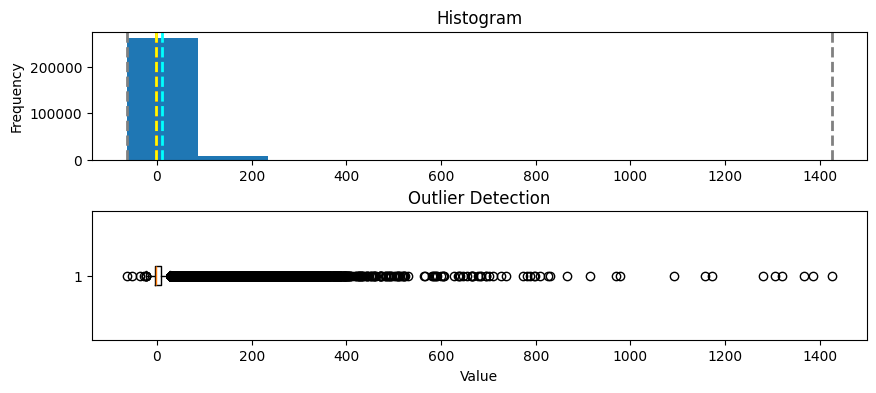

ArrDelay 
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



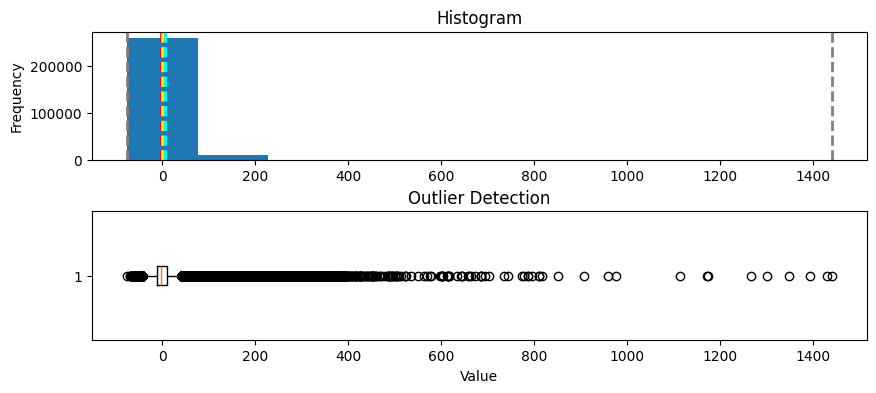

In [7]:
# Outlier detection
%matplotlib inline
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(var_data.name,'\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    #plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')
    ax[0].set_title('Histogram')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    
    #plot boxplot
    ax[1].boxplot(var_data, vert=False) #showfliers=False)
    ax[1].set_xlabel('Value')
    ax[1].set_title('Outlier Detection')

    #control spacing
    plt.subplots_adjust(hspace=0.4)
    
    #show figure
    plt.show()

dedelay = data['DepDelay']
Ardelay = data['ArrDelay']


show_distribution(dedelay)
show_distribution(Ardelay)


There are a outliers at the lower and upper ends of both variables - particularly at the upper end.

##### Use the Interquartile Range (IQR) to calculate the lower and upper whiskers based on the quartiles of the data. Lower Whisker: Q1 - 1.5*IQR, Upper Whisker: Q3 + 1.5 * IQR where Q1 and Q3 are the 25th and 75th percentiles, respectively, and IQR is the interquartile range (Q3 - Q1)

In [8]:
def CalcIQR(var_data):
    #Calculate Q1 and Q3
    Q1 = var_data.quantile(0.25)
    Q3 = var_data.quantile(0.75)
    
    #Calculate IQR
    IQR = Q3 - Q1
    
    #Calculate lower and upper whiskers
    lw = Q1 - 1.5 *IQR
    uw = Q3 + 1.5 *IQR
    
    print(f"Lower Whisker: {lw}")
    print(f"Upper Whisker: {uw}")
    
dd = data['DepDelay']
ad = data['ArrDelay']

print('DepDelay:')
CalcIQR(dd)
print('ArrDelay')
CalcIQR(ad)



DepDelay:
Lower Whisker: -23.5
Upper Whisker: 28.5
ArrDelay
Lower Whisker: -42.5
Upper Whisker: 41.5


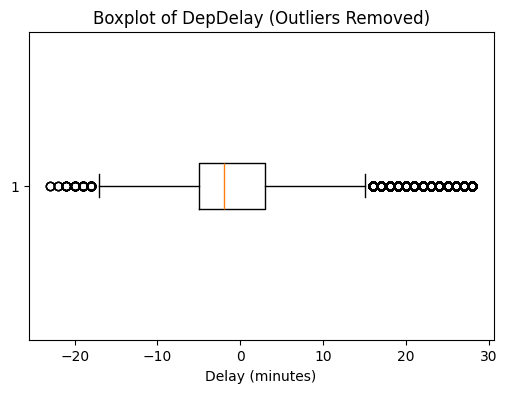

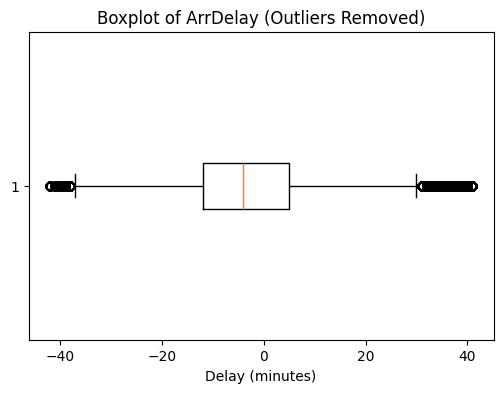

In [9]:
import matplotlib.pyplot as plt

# Function to plot boxplot without showing outliers
def plotboxplot(var_data, title, lower_whisker, upper_whisker):
    # Filter data to exclude outliers based on specified whisker range
    filtered_data = var_data[(var_data >= lower_whisker) & (var_data <= upper_whisker)]
    
    # Plot boxplot without showing outliers
    plt.figure(figsize=(6, 4))
    plt.boxplot(filtered_data, vert=False)
    plt.title(f'Boxplot of {title} (Outliers Removed)')
    plt.xlabel('Delay (minutes)')
    plt.show()

# Plot boxplots for DepDelay and ArrDelay without showing outliers
plotboxplot(dd, 'DepDelay', -23.5, 28.5)
plotboxplot(ad, 'ArrDelay', -42.5, 41.5)


DepDelay:
Lower Whisker: -17.0
Upper Whisker: 15.0
ArrDelay
Lower Whisker: -37.5
Upper Whisker: 30.5


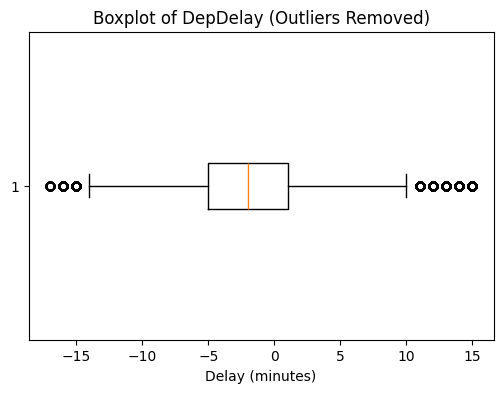

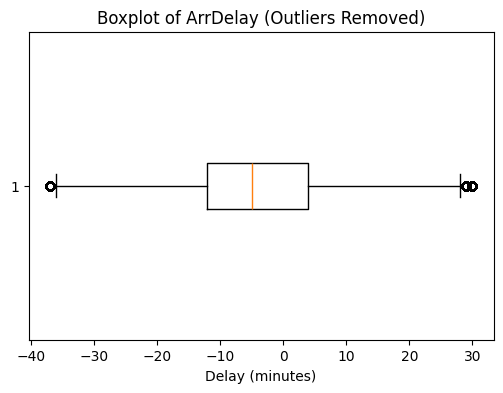

In [10]:
new_dd = dd[(dd >= -23.5) & (dd <= 28.5)]
new_ad = ad[(ad >= -42.5) & (ad <= 41.5)]

print('DepDelay:')
CalcIQR(new_dd)
print('ArrDelay')
CalcIQR(new_ad)

# Plot boxplots for DepDelay and ArrDelay without showing outliers
plotboxplot(new_dd, 'DepDelay', -17.0, 15.0)
plotboxplot(new_ad, 'ArrDelay', -37.5, 30.5)


DepDelay:
Lower Whisker: -14.0
Upper Whisker: 10.0
ArrDelay
Lower Whisker: -36.0
Upper Whisker: 28.0


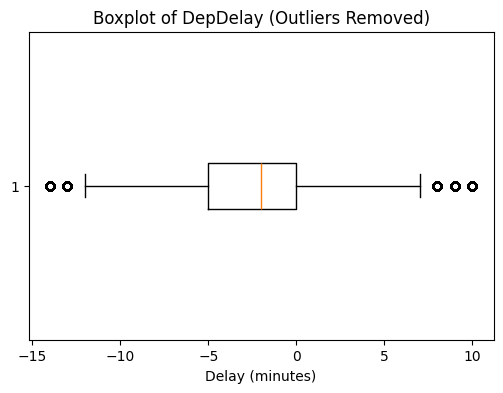

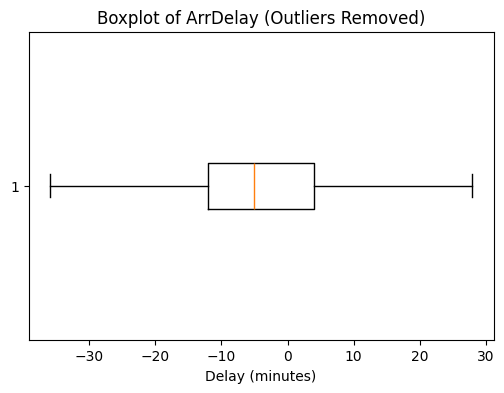

In [11]:
new_dd_1 = new_dd[(new_dd >= -17.0) & (new_dd <= 15.0)]
new_ad_1 = new_ad[(new_ad >= -37.5) & (new_ad <= 30.5)]

print('DepDelay:')
CalcIQR(new_dd_1)
print('ArrDelay')
CalcIQR(new_ad_1)

# # Plot boxplots for DepDelay and ArrDelay without showing outliers
plotboxplot(new_dd_1, 'DepDelay', -14.0, 10.0)
plotboxplot(new_ad_1, 'ArrDelay', -36.0, 28.0)

DepDelay:
Lower Whisker: -12.5
Upper Whisker: 7.5


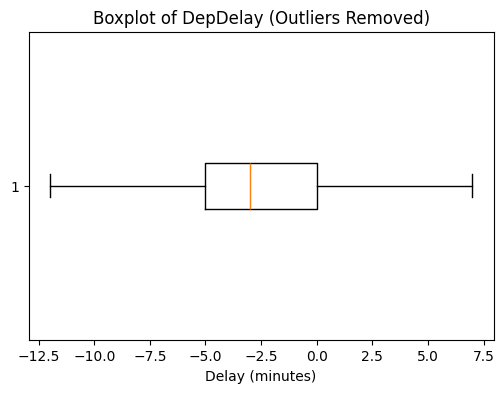

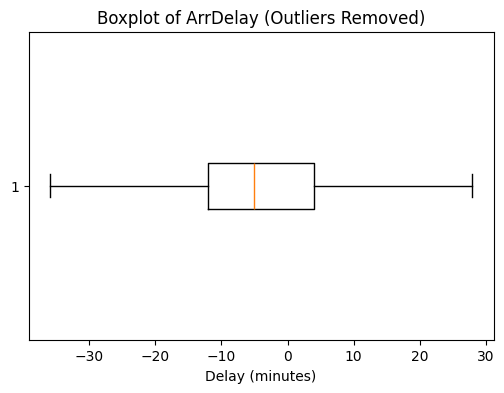

In [12]:
new_dd_2 = new_dd_1[(new_dd_1 >= -14.0) & (new_dd_1 <= 10.0)]
new_ad_2 = new_ad_1[(new_ad_1 >= -36.0) & (new_ad_1 <= 28.0)]


print('DepDelay:')
CalcIQR(new_dd_2)

# # Plot boxplots for DepDelay and ArrDelay without showing outliers
plotboxplot(new_dd_1, 'DepDelay', -12.5, 7.5)
plotboxplot(new_ad_1, 'ArrDelay', -36.0, 28.0)

In [13]:
new_dd_3 = new_dd_2[(new_dd_2 >= -12.5) & (new_dd_1 <= 7.5)]
new_ad_2 = new_ad_1[(new_ad_1 >= -36.0) & (new_ad_1 <= 28.0)]


print('DepDelay:')
CalcIQR(new_dd_3)
print('ArrDelay:')
CalcIQR(new_ad_2)

DepDelay:
Lower Whisker: -12.5
Upper Whisker: 7.5
ArrDelay:
Lower Whisker: -36.0
Upper Whisker: 28.0


In [14]:


# Replace the original columns in data with the cleaned versions
data['DepDelay'] = new_dd_3.reindex(data.index)  # Align to original index
data['ArrDelay'] = new_ad_2.reindex(data.index)    # Align to original index
data.isnull().sum()






Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
Carrier                  0
OriginAirportID          0
OriginAirportName        0
OriginCity               0
OriginState              0
DestAirportID            0
DestAirportName          0
DestCity                 0
DestState                0
CRSDepTime               0
DepDelay             75165
DepDel15                 0
CRSArrTime               0
ArrDelay             35918
ArrDel15                 0
Cancelled                0
dtype: int64

In [15]:
# delete any row in data that has a missing value in either the DepDelay or ArrDelay columns. When inplace=True, the original DataFrame is modified directly. This is useful if you want to apply changes without creating a new variable.
data.dropna(subset=['DepDelay', 'ArrDelay'], inplace=True)
data.isnull().sum()


Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

DepDelay 
Minimum:-12.00
Mean:-2.47
Median:-3.00
Mode:-3.00
Maximum:7.00



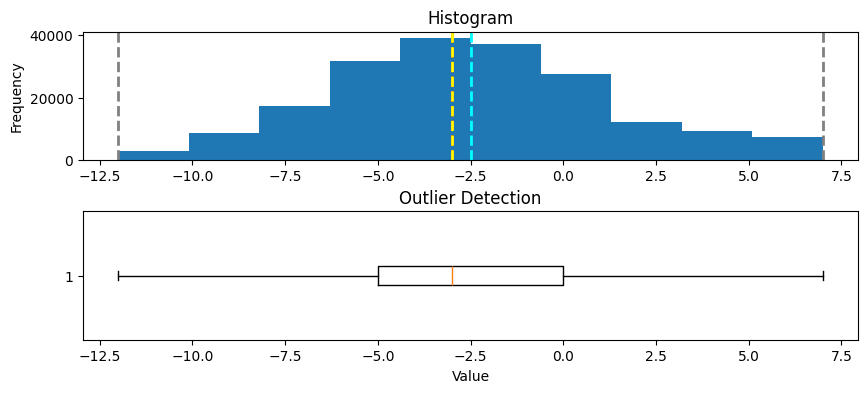

ArrDelay 
Minimum:-36.00
Mean:-6.80
Median:-7.00
Mode:0.00
Maximum:28.00



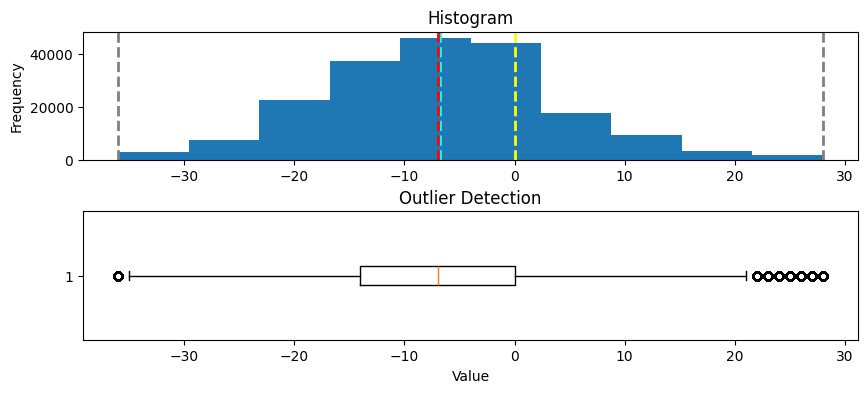

In [16]:
dedelay = data['DepDelay']
Ardelay = data['ArrDelay']

show_distribution(dedelay)
show_distribution(Ardelay)

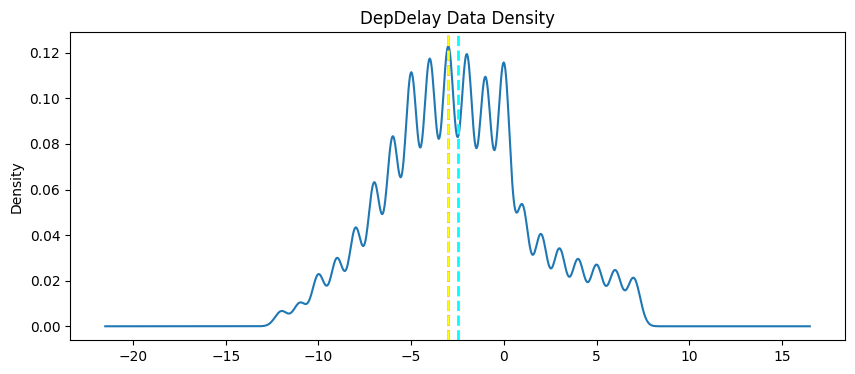

Kurtosis of Data: 2.8397542119235237
Skewness of Data: 0.23102495425524933


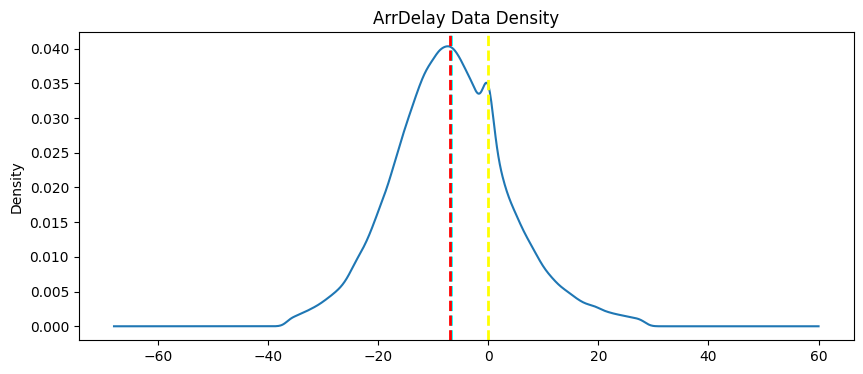

Kurtosis of Data: 3.3195672730034187
Skewness of Data: 0.22825202135290162


In [17]:
#The density plot relies on scipy's gaussian_kde function to calculate the kernel density estimate. Without scipy, the plot.density() method from pandas cannot create the density plot.

def show_density(var_data):
    from matplotlib import pyplot as plt
    from scipy.stats import kurtosis, skew

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title(f'{var_data.name} Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

    #calculate kurtosis and skewness. fisher=False function uses the "Pearson definition" of kurtosis, where the kurtosis of a normal distribution is 3. Kurtosis >3 is Leptokurtic i.e sharp peak while Kurtosis < 3 is Platykurtic i.e lighter tails than normal and Kurtosis = 3 Mesokurtic similar to a normal distribution.
    kurt_var_data = kurtosis(var_data, fisher=False)
    skew_var_data = skew(var_data)

    print(f"Kurtosis of Data: {kurt_var_data}")
    print(f"Skewness of Data: {skew_var_data}")



# for i in col works, but it’s not as explicit, making it harder to tell that i represents column names.
# for i in col.columns is preferred because it clearly indicates that we’re working with column names, not rows or other data, and it avoids potential confusion.

col = data[['DepDelay', 'ArrDelay']]
for i in col.columns:
    show_density(col[i])


### Descriptive Statistics 

### Explore the data

Let's start with an overall view of the summary statistics for the numeric columns.

In [18]:
#DepDelay and ArrDelay fields
data[['DepDelay', 'ArrDelay']].describe()

,DepDelay,ArrDelay
count,193010.000000,193010.000000
mean,-2.474032,-6.799466
std,3.948652,10.632779
min,-12.000000,-36.000000
25%,-5.000000,-14.000000
50%,-3.000000,-7.000000
75%,0.000000,0.000000
max,7.000000,28.000000


##### Mean

- **DepDelay**: The mean delay is -2.47 minutes, meaning flights tended to leave about 2 minutes ahead of schedule on average.

- **ArrDelay**: The mean arrival delay is -6.80 minutes, suggesting that flights generally arrived approximately 6 minutes earlier than scheduled.

These negative means for both departure and arrival delays indicate an overall trend of flights running slightly ahead of schedule.

##### Standard Deviation (std)

- **DepDelay** (3.95 minutes): A relatively low standard deviation suggesting that most departure delays are within a narrow range around the average.

- **ArrDelay** (10.63 minutes): The higher standard deviation for arrival delays indicates more variability in arrival times, suggesting that while many flights arrive a bit early, some arrive significantly later or earlier than the mean of -6.80 minutes.

#####  Minimum and Maximum

- **DepDelay**: The minimum delay is -12 minutes, meaning the earliest departure left 12 minutes ahead of schedule, while the maximum delay is 7 minutes, indicating the latest departure left only 7 minutes after the scheduled time.

- **ArrDelay**: The minimum arrival delay is -36 minutes (the earliest arrival was 36 minutes ahead of schedule), while the maximum delay was 28 minutes (the latest arrival was 28 minutes after schedule).

Both fields show that while flights generally don’t face severe delays, the range for arrival times is broader than that for departure, with some flights arriving much earlier or somewhat later than scheduled.

##### Percentiles (25%, 50%, 75%)

**DepDelay**:
- 25th Percentile (-5 minutes): A quarter of the flights departed 5 minutes or more ahead of schedule.
- 50th Percentile (-3 minutes, median): The median delay is -3 minutes, meaning half the flights left 3 minutes or more before their scheduled time.
- 75th Percentile (0 minutes): Three-quarters of flights left on schedule.

**ArrDelay**:
- 25th Percentile (-14 minutes): A quarter of flights arrived 14 minutes or more ahead of schedule.
- 50th Percentile (-7 minutes, median): Half of the flights arrived at least 7 minutes early.
- 75th Percentile (0 minutes): Three-quarters of flights arrived on or before their scheduled time.

# Potential Insights 

# Frequency Counts for Categorical and Binary Fields

In [19]:
# most frequently occurring values for each of these columns
data[['Month', 'DayofMonth', 'DayOfWeek', 'Carrier']].mode()

,Month,DayofMonth,DayOfWeek,Carrier
0,10,16,2,WN


#####
- **Month (10)**: October was the month with the highest number of flights.

- **DayofMonth (16)**: The 16th day of each month had the most flights, suggesting mid-month might be a busier time.

- **DayOfWeek (2)**: Tuesday was the busiest day, which might reflect scheduling patterns for certain flights or travel preferences.

- **Carrier (WN)**: Southwest Airlines (WN) had the most flights recorded in the dataset, indicating it may be the dominant airline within this data.

## Flight Delay and Cancellation Analysis

Explanation of Mean Calculation for Proportions

The **Mean** function is used to calculate proportions because:

- **Binary Data** - It counts the '1's (True values) in the column and divides by the total count, giving the fraction of times the condition is met. This fraction is essentially the proportion of flights that were delayed or canceled, which we covert to a percentage by multiplying by 100.

In [20]:
data[['DepDel15', 'ArrDel15', 'Cancelled']].value_counts()

DepDel15  ArrDel15  Cancelled
0.0       0         0            183724
          1         0              6460
                    1              2826
Name: count, dtype: int64

In [21]:
# Calculate the proportion (as a percentage) for delayed departures, delayed arrivals, and cancellations 
proportions = data[['DepDel15', 'ArrDel15', 'Cancelled']].mean() * 100

# Display the result
print(proportions)


DepDel15     0.000000
ArrDel15     4.811150
Cancelled    1.464173
dtype: float64


#####
- **DepDel15**: 0.00% — None of the flights were delayed for 15 minutes or more at departure.
- **ArrDel15**: 4.81% — About 4.8% of flights had an arrival delay of 15 minutes or more, indicating some level of service delay upon arrival.
- **Cancelled**: 1.46% — Approximately 1.46% of flights were canceled, suggesting that only a small portion of scheduled flights were not completed as planned.

In [22]:
#confirm no recorded 15+ minute departure delays
data[data['DepDel15'] >= 1]['DepDel15'].count()


0

### Perform binning on CRSDepTime (Scheduled Departure Time) and CRSArrTime (Scheduled Arrival Time) for time-of-day analysis

Explanation of Bins:

- 0 to 600: This represents 12:00 AM to 5:59 AM (Early Morning).
- 600 to 1200: This represents 6:00 AM to 11:59 AM (Midday).
- 1200 to 1800: This represents 12:00 PM to 5:59 PM (Afternoon).
- 1800 to 2400: This represents 6:00 PM to 11:59 PM (Night).



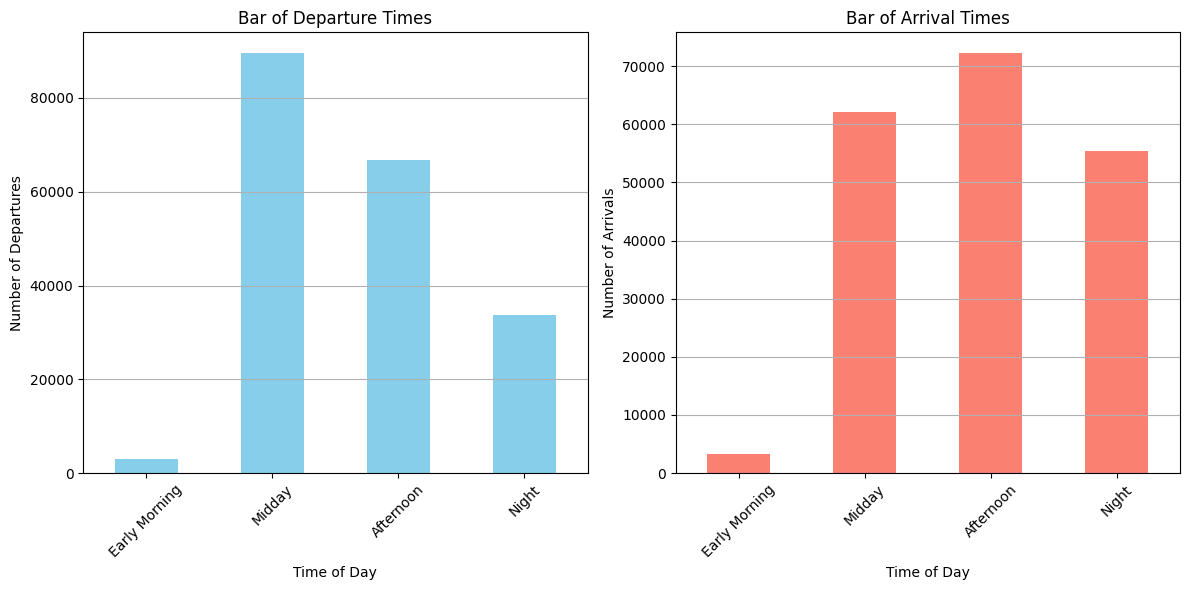

In [23]:


# Define the bins and labels for time of day
bins = [0, 600, 1200, 1800, 2400]  # Bins for times in HHMM format
labels = ['Early Morning', 'Midday', 'Afternoon', 'Night']  # Labels for the bins

# Bin the CRSDepTime and CRSArrTime. The pd.cut() function is used to categorize the departure times into defined bins. The value_counts() method counts how many times each category (time bin) occurs, and sort_index() organizes them in the correct order. If you want the output to be in the natural order of the time categories (like "Early Morning," "Midday," "Afternoon," "Night"), you need to sort it explicitly. right=False means the upper limit of each bin is excluded. The Early Morning bin includes times up to but not including 6:00 AM.
data['DepTimeGroup'] = pd.cut(data['CRSDepTime'], bins=bins, labels=labels, right=False)
data['ArrTimeGroup'] = pd.cut(data['CRSArrTime'], bins=bins, labels=labels, right=False)


# Count occurrences in each bin
Dep_counts = data['DepTimeGroup'].value_counts().sort_index()
Arr_counts = data['ArrTimeGroup'] .value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Departure Times
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
Dep_counts.plot(kind='bar', color='skyblue')
plt.title('Bar of Departure Times')
plt.xlabel('Time of Day')
plt.ylabel('Number of Departures')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Plot for Arrival Times
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
Arr_counts.plot(kind='bar', color='salmon')
plt.title('Bar of Arrival Times')
plt.xlabel('Time of Day')
plt.ylabel('Number of Arrivals')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plots
plt.tight_layout()  # Adjusts subplot params for better layout
plt.show()


In [24]:
# To find the most common scheduled departure time
most_frequent_departure_time = data['CRSDepTime'].mode()
print(f'Most_frequent_departure_time: {most_frequent_departure_time}')

# To find the most common scheduled arrival time
most_frequent_arrival_time = data['CRSArrTime'].mode()
print(f'Most_frequent_arrival_time : {most_frequent_arrival_time }')



Most_frequent_departure_time: 0    600
Name: CRSDepTime, dtype: int64
Most_frequent_arrival_time : 0    930
Name: CRSArrTime, dtype: int64


Many flights are scheduled to depart at 6:00 AM and arrive at 9:30 AM. This could indicate peak travel times, often associated with morning flights. While the mode indicates a busy schedule for arrivals at 9:30 AM, the histogram analysis reveals that the afternoon is also a peak period for both departures and arrivals, reflecting a diverse range of travel needs throughout the day.


Analysis of Delays:

Investigate whether flights during the midday period tend to have higher average delays compared to other times of the day. This can help determine if congestion is affecting on-time performance.

In [25]:
# Calculate average delays for each time group
average_delays = data.groupby('DepTimeGroup')['DepDelay'].mean()

# Display results
print(average_delays)


C:\Users\hp\AppData\Local\Temp\ipykernel_6340\1667369863.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_delays = data.groupby('DepTimeGroup')['DepDelay'].mean()


DepTimeGroup
Early Morning   -3.443641
Midday          -2.783688
Afternoon       -2.114182
Night           -2.276767
Name: DepDelay, dtype: float64


You can see that the average delays increase slightly as the day progresses, with the least negative value occurring during the early morning and midday, suggesting that delays become more pronounced in the afternoon and night.

Seasonal Trends:

Analyze if this pattern holds across different seasons or months. Are there specific times of the year when midday flights are even busier?

In [26]:
data['Month'].value_counts()

Month
10    28871
8     28286
5     28275
9     27456
4     27440
7     27226
6     25456
Name: count, dtype: int64

DepTimeGroup   Month
Midday         5        13156
               7        13068
               8        13043
               10       12927
               4        12578
               9        12556
               6        12200
Afternoon      10       10518
               9         9870
               8         9774
               5         9755
               4         9410
               7         9019
               6         8451
Night          10        5051
               4         5050
               5         4983
               8         4953
               9         4694
               7         4640
               6         4271
Early Morning  6          534
               8          516
               7          499
               4          402
               5          381
               10         375
               9          336
Name: count, dtype: int64
Index(['DepTimeGroup', 'Month', 'count'], dtype='object')
ArrTimeGroup   Month
Afternoon      10       11068
    

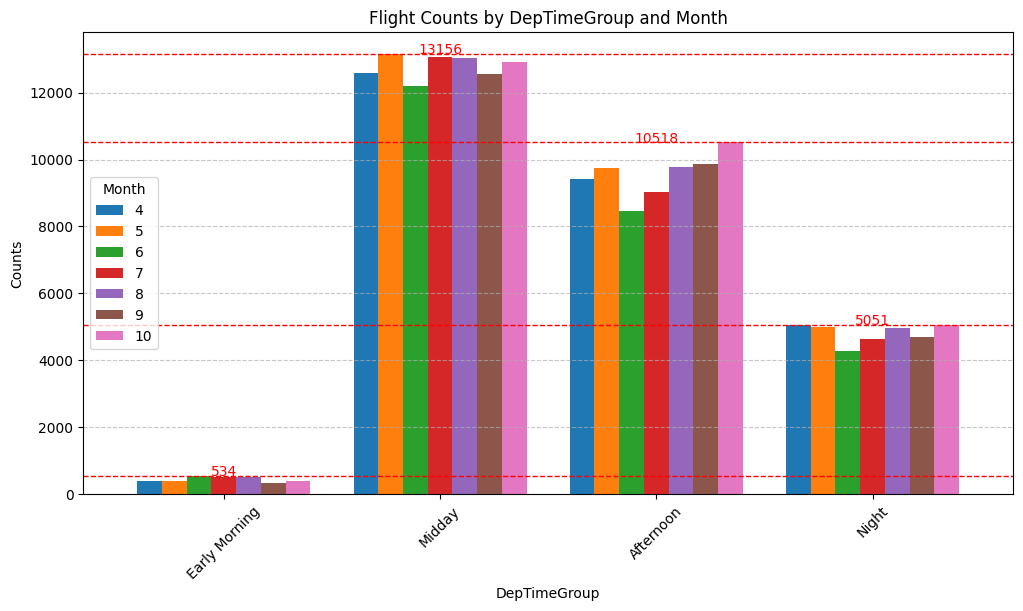

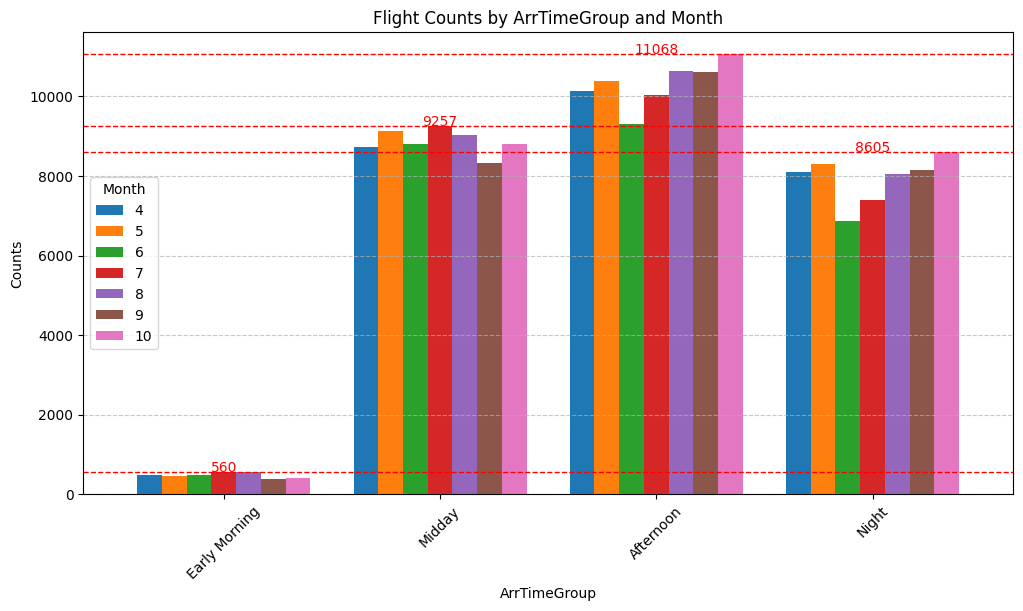

In [27]:
def timegroup(var_data):
    timegroup_by_month = data[[var_data, 'Month']].value_counts()
    print(timegroup_by_month)
    
    # After running value_counts(), we get a Series where the DepTimeGroup and Month combination forms the index. reset_index() changes this from a Series into a DataFrame, making DepTimeGroup and Month regular columns.
    df_counts = timegroup_by_month.reset_index()
    print(df_counts.columns)  # To check column names
    
    # Rename the last column to 'Counts' (usually it's named 0 by default after reset_index)
    df_counts.columns = [var_data, 'Month', 'Counts']
    
    # Pivot the DataFrame. Pivoting: This rearranges the DataFrame to make it suitable for a clustered bar plot. index='Month' means each row will represent a month. columns='DepTimeGroup' makes each DepTimeGroup (like "Midday", "Afternoon", etc.) a separate column. values='Counts' fills these rows and columns with the count of flights for each DepTimeGroup and Month. fillna(0) replaces any missing values with 0. This is needed if, for example, some months don’t have flights at a certain time (so that all bars display correctly).
    pivot_df = df_counts.pivot(index=var_data, columns='Month', values='Counts').fillna(0)
    
    # Get maximum counts for each DepTimeGroup
    max_counts = pivot_df.max(axis=1)
    
    # Plotting
    ax = pivot_df.plot(kind='bar', figsize=(12, 6), width=0.8)
    plt.title(f'Flight Counts by {var_data} and Month')
    plt.xlabel(f'{var_data}')
    plt.ylabel('Counts')
    plt.legend(title='Month')
    plt.xticks(rotation=45)  
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Adding vertical lines for maximum values
    for i, max_value in enumerate(max_counts):
        # Adding vertical line at each DepTimeGroup position
        plt.axhline(y=max_value, color='red', linestyle='--', linewidth=1)
        
        # Adding maximum value labels directly on the bars
        ax.text(i, max_value + 0.5, f'{int(max_value)}', ha='center', color='red', fontsize=10)

plt.show()

# Call the function with column names
timegroup('DepTimeGroup')
timegroup('ArrTimeGroup')


In [28]:
# count how many flights occur for each unique (DepTimeGroup, Month) combination. .size() is used after a groupby operation to count the number of entries within each group. It counts the number of rows within each unique combination of these categories. .value_counts() counts the occurrences of unique values in a single column, not across groups of multiple columns.
monthly_trends = data.groupby(['DepTimeGroup', 'Month']).size()
monthly_trends

# # Count by day of the month
# dayofmonth_trends = data.groupby(['DepTimeGroup', 'DayofMonth']).size()

# # Count by day of the week
# weekday_trends = data.groupby(['DepTimeGroup', 'DayOfWeek']).size()



C:\Users\hp\AppData\Local\Temp\ipykernel_6340\3205439676.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trends = data.groupby(['DepTimeGroup', 'Month']).size()


DepTimeGroup   Month
Early Morning  4          402
               5          381
               6          534
               7          499
               8          516
               9          336
               10         375
Midday         4        12578
               5        13156
               6        12200
               7        13068
               8        13043
               9        12556
               10       12927
Afternoon      4         9410
               5         9755
               6         8451
               7         9019
               8         9774
               9         9870
               10       10518
Night          4         5050
               5         4983
               6         4271
               7         4640
               8         4953
               9         4694
               10        5051
dtype: int64

### Cross-Tabulations and Grouped Statistics


In [29]:
# Calculate average Departure Delay by Day of the Week
avg_dep_delay = data.groupby('DayOfWeek')['DepDelay'].mean()


# Calculate average Arrival Delay by Day of the Week
avg_arr_delay = data.groupby('DayOfWeek')['ArrDelay'].mean()

# Calculate average Departure Delay by Month
avg_dep_delay_1 = data.groupby('Month')['DepDelay'].mean()

# Calculate average Arrival Delay by Month
avg_arr_delay_1 = data.groupby('Month')['ArrDelay'].mean()

print(f'Average Departure Delay by Day of the Week: {avg_dep_delay}')
print(f'Average Arrival  Delay by Day of the Week: {avg_arr_delay}')
print(f'Average Departure Delay by Day of the Month: {avg_dep_delay_1}')
print(f'Average Arrival  Delay by Day of the Month: {avg_arr_delay_1}')



Average Departure Delay by Day of the Week: DayOfWeek
1   -2.407457
2   -2.646107
3   -2.607094
4   -2.273379
5   -2.292117
6   -2.587393
7   -2.497792
Name: DepDelay, dtype: float64
Average Arrival  Delay by Day of the Week: DayOfWeek
1   -6.693172
2   -7.188727
3   -6.458350
4   -5.865030
5   -6.381061
6   -7.870639
7   -7.271727
Name: ArrDelay, dtype: float64
Average Departure Delay by Day of the Month: Month
4    -2.580794
5    -2.457542
6    -2.031427
7    -2.191912
8    -2.349996
9    -2.956039
10   -2.708150
Name: DepDelay, dtype: float64
Average Arrival  Delay by Day of the Month: Month
4    -6.928025
5    -6.960177
6    -5.881717
7    -5.920480
8    -6.693700
9    -7.846627
10   -7.265768
Name: ArrDelay, dtype: float64


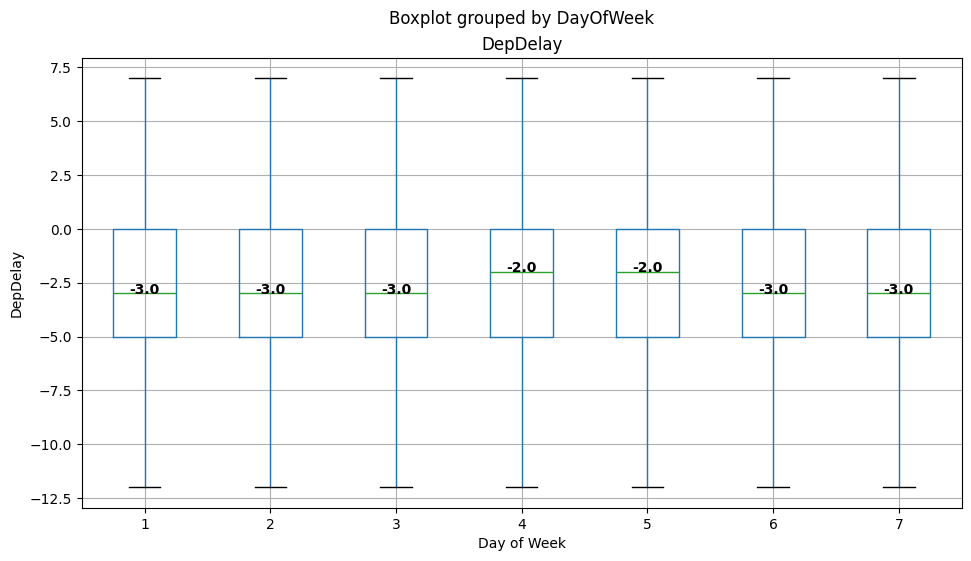

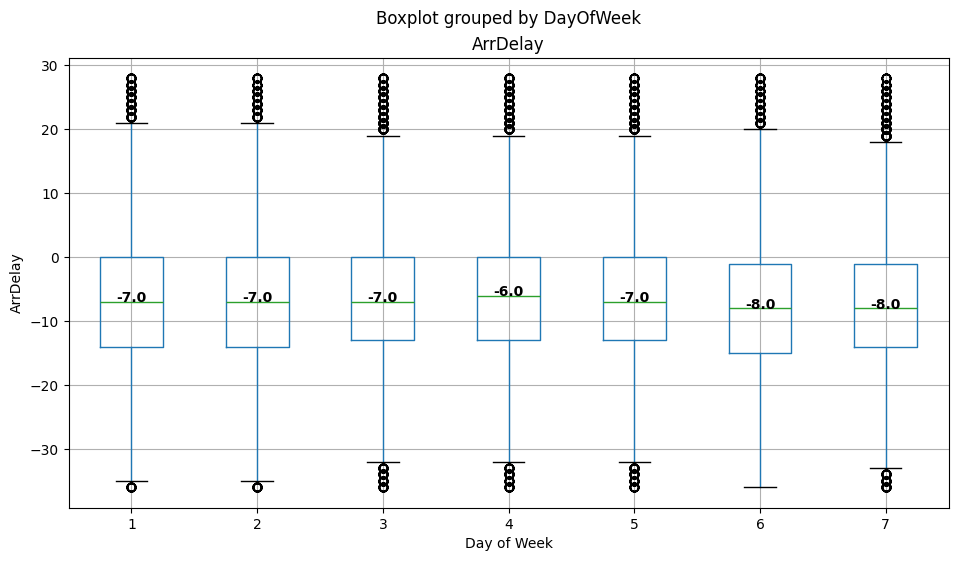

In [30]:
def plotboxplt(var_data):
        #plt.boxplot() does not accept column and by arguments directly. Instead, you should use pandas.DataFrame.boxplot(), which allows grouping by a specific column (by argument) and plotting another column (column argument).
    data.boxplot(column=var_data, by='DayOfWeek', figsize=(11,6))
    
    plt.xlabel('Day of Week')
    plt.ylabel(var_data)
    
    # Calculate and annotate the median for each month
    medians = data.groupby('DayOfWeek')[var_data].median()
    
    for i, median in enumerate(medians, start=1):
        plt.text(i, median, f'{median:.1f}', horizontalalignment='center', color='black', weight='semibold')
    plt.show()

plotboxplt('DepDelay')
plotboxplt('ArrDelay')

#### How do the carriers compare in terms of arrival delay performance?

In [31]:
data['Carrier'].value_counts()

Carrier
WN    36085
DL    30316
AA    20180
UA    19521
US    18848
OO    12329
EV    10899
B6     8469
MQ     7696
FL     6490
9E     6083
AS     5578
YV     3911
VX     2545
F9     2392
HA     1668
Name: count, dtype: int64

In [32]:
carrier_delays = data.groupby('Carrier')[['DepDelay', 'ArrDelay', 'ArrDel15', 'DepDel15']].mean()
carrier_delays

,DepDelay,ArrDelay,ArrDel15,DepDel15
Carrier,,,,
9E,-3.842512,-8.836265,0.067565,0.0
AA,-2.375917,-7.759613,0.050743,0.0
AS,-4.109537,-4.964683,0.044819,0.0
B6,-3.761247,-7.647302,0.047113,0.0
DL,-2.665160,-7.927200,0.033085,0.0
EV,-3.759427,-8.568217,0.069181,0.0
F9,-2.572324,-2.577341,0.042642,0.0
FL,-2.242219,-5.941602,0.046687,0.0
HA,-3.716427,-3.179257,0.023381,0.0


In [33]:
carrier_delays_sorted = carrier_delays.sort_values(by='ArrDelay', ascending=False)
print(carrier_delays_sorted)


         DepDelay  ArrDelay  ArrDel15  DepDel15
Carrier                                        
F9      -2.572324 -2.577341  0.042642       0.0
HA      -3.716427 -3.179257  0.023381       0.0
AS      -4.109537 -4.964683  0.044819       0.0
WN      -0.247222 -5.023722  0.033283       0.0
YV      -3.698287 -5.144464  0.058808       0.0
US      -3.427260 -5.347093  0.063561       0.0
OO      -3.689350 -5.547571  0.051342       0.0
FL      -2.242219 -5.941602  0.046687       0.0
MQ      -3.211279 -6.085369  0.097583       0.0
VX      -2.118664 -6.823969  0.042829       0.0
B6      -3.761247 -7.647302  0.047113       0.0
AA      -2.375917 -7.759613  0.050743       0.0
DL      -2.665160 -7.927200  0.033085       0.0
EV      -3.759427 -8.568217  0.069181       0.0
9E      -3.842512 -8.836265  0.067565       0.0
UA      -2.006403 -9.787050  0.045028       0.0


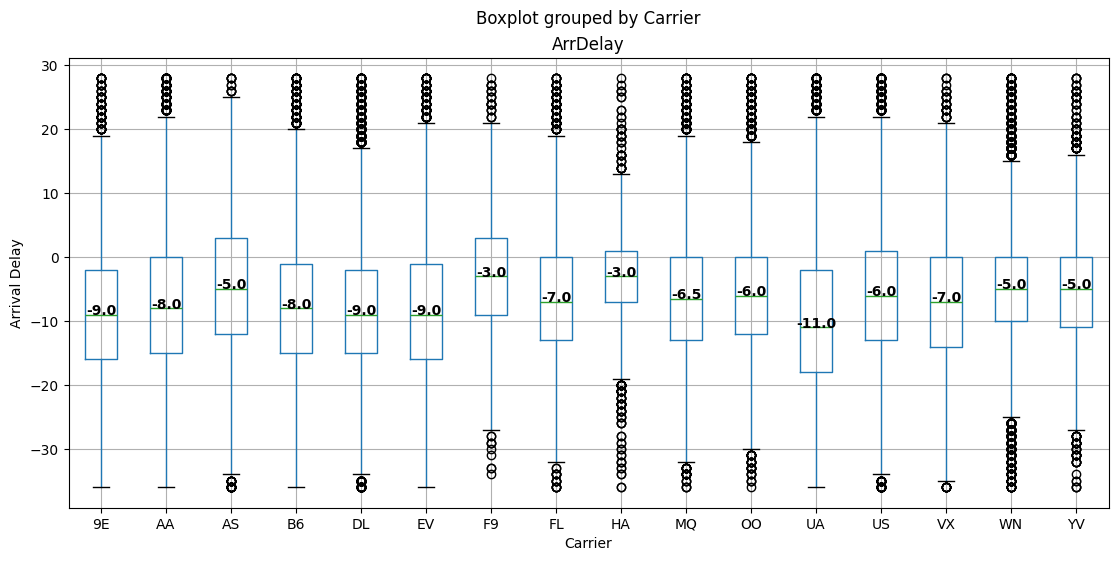

In [34]:
#plt.boxplot() does not accept column and by arguments directly. Instead, you should use pandas.DataFrame.boxplot(), which allows grouping by a specific column (by argument) and plotting another column (column argument).
data.boxplot(column='ArrDelay', by='Carrier', figsize=(13,6))
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay')
    
# Calculate and annotate the median for each month
medians = data.groupby('Carrier')['ArrDelay'].median()
    
for i, median in enumerate(medians, start=1):
        plt.text(i, median, f'{median:.1f}', horizontalalignment='center', color='black', weight='semibold')
plt.show()


#### Do late departures tend to result in longer arrival delays than on time departures?

In [35]:
# Filter data into late and on-time departures
late_departures = data[data['DepDelay'] > 0]
on_time_departures = data[data['DepDelay'] <= 0]

# Calculate the average arrival delay for each group
avg_arr_delay_late = late_departures['ArrDelay'].mean()
avg_arr_delay_on_time = on_time_departures['ArrDelay'].mean()

# Display results
print(f"Average arrival delay for late departures: {avg_arr_delay_late} minutes")
print(f"Average arrival delay for on-time departures: {avg_arr_delay_on_time} minutes")

if avg_arr_delay_late > avg_arr_delay_on_time:
    print("Late departures tend to result in longer arrival delays than on-time departures.")
else:
    print("Late departures do not necessarily result in longer arrival delays than on-time departures.")


Average arrival delay for late departures: -1.7250982173878184 minutes
Average arrival delay for on-time departures: -8.01975024583368 minutes
Late departures tend to result in longer arrival delays than on-time departures.


#### Which route (from origin airport to destination airport) has the most late arrivals?

In [56]:
data.groupby(['OriginAirportName', 'DestAirportName'])['ArrDel15'].size()

OriginAirportName                  DestAirportName                                     
Albuquerque International Sunport  Baltimore/Washington International Thurgood Marshall     33
                                   Chicago Midway International                             24
                                   Chicago O'Hare International                             32
                                   Dallas Love Field                                       104
                                   Dallas/Fort Worth International                         128
                                                                                          ... 
William P Hobby                    San Antonio International                                52
                                   San Diego International                                  27
                                   Seattle/Tacoma International                              2
                                   Tampa International   

In [58]:
data.groupby(['OriginAirportName', 'DestAirportName'])['ArrDel15'].value_counts()

OriginAirportName                  DestAirportName                                       ArrDel15
Albuquerque International Sunport  Baltimore/Washington International Thurgood Marshall  0           33
                                   Chicago Midway International                          0           23
                                                                                         1            1
                                   Chicago O'Hare International                          0           30
                                                                                         1            2
                                                                                                     ..
William P Hobby                    San Diego International                               1            1
                                   Seattle/Tacoma International                          0            2
                                   Tampa International                

In [60]:
# Filter for rows where ArrDel15 indicates a late arrival
filter_data = data[data['ArrDel15'] > 0]

# Group by OriginAirportName and DestAirportName, and count occurrences of late arrivals
origin_destination_late_arrivals = (
    filter_data.groupby(['OriginAirportName', 'DestAirportName'])['ArrDel15']
    .value_counts()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)

origin_destination_late_arrivals



,OriginAirportName,DestAirportName,ArrDel15,Count
1696,San Francisco International,Los Angeles International,1,69
945,Los Angeles International,San Francisco International,1,51
805,LaGuardia,Hartsfield-Jackson Atlanta International,1,48
794,LaGuardia,Charlotte Douglas International,1,38
920,Los Angeles International,John F. Kennedy International,1,36
...,...,...,...,...
1478,Port Columbus International,Southwest Florida International,1,1
760,Kahului Airport,Metropolitan Oakland International,1,1
761,Kahului Airport,Norman Y. Mineta San Jose International,1,1
762,Kahului Airport,Phoenix Sky Harbor International,1,1


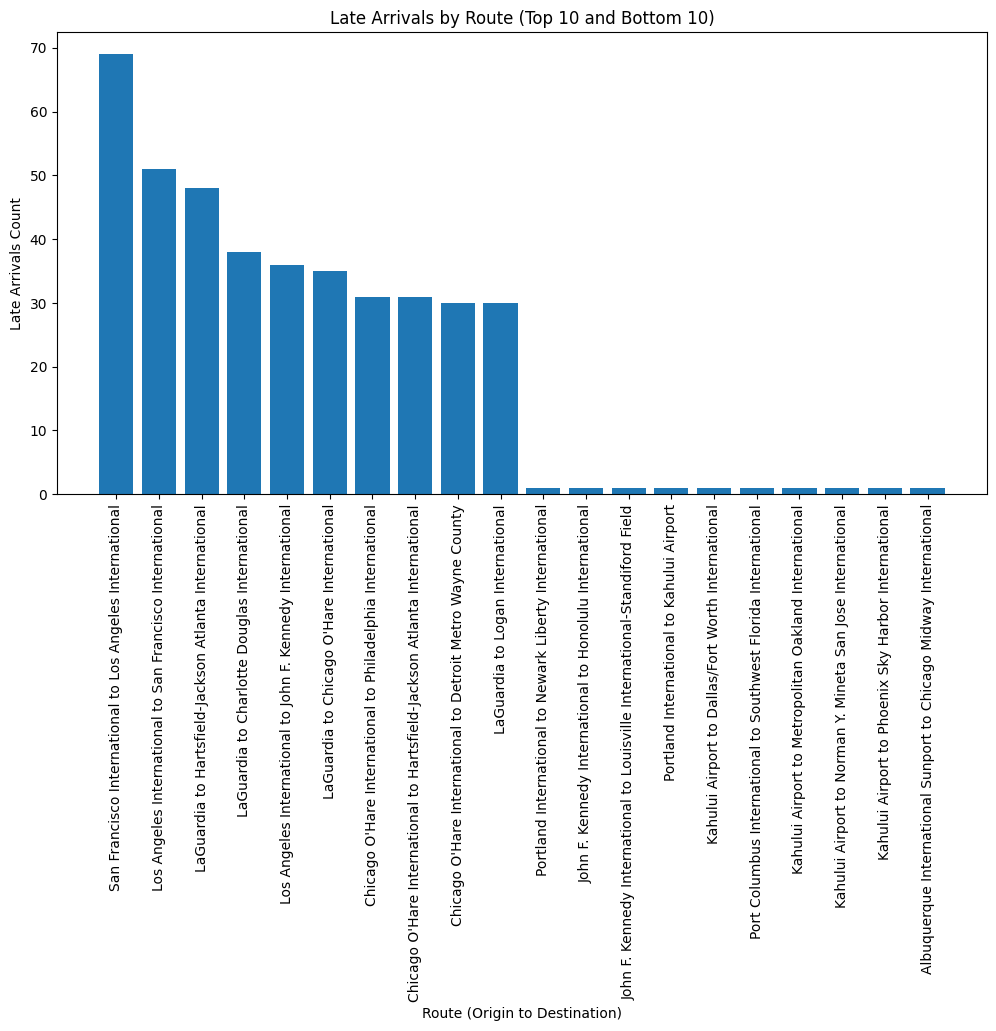

In [64]:
# Get the first 10 and last 10 entries
first_10 = origin_destination_late_arrivals.head(10)
last_10 = origin_destination_late_arrivals.tail(10)

# Combine the first and last 10 entries
combined = pd.concat([first_10, last_10])

# Concatenate airport names for plotting
airport_name = combined['OriginAirportName'] + " to " + combined['DestAirportName']

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(airport_name, combined['Count'])
plt.xticks(rotation=90)
plt.xlabel('Route (Origin to Destination)')
plt.ylabel('Late Arrivals Count')
plt.title('Late Arrivals by Route (Top 10 and Bottom 10)')
plt.show()

#### Which route has the highest average arrival delay?

In [67]:
data.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].mean().reset_index(name='AverageDelay').sort_values(by='AverageDelay', ascending=False)

,OriginAirportName,DestAirportName,AverageDelay
1236,Louis Armstrong New Orleans International,Ronald Reagan Washington National,24.500000
910,John F. Kennedy International,Louisville International-Standiford Field,18.000000
397,Cleveland-Hopkins International,Palm Beach International,18.000000
398,Cleveland-Hopkins International,Philadelphia International,10.833333
1312,McCarran International,Louisville International-Standiford Field,9.800000
...,...,...,...
231,Chicago Midway International,John Wayne Airport-Orange County,-21.500000
931,John F. Kennedy International,San Antonio International,-22.181818
507,Denver International,Kahului Airport,-25.500000
846,Indianapolis International,Logan International,-26.000000


#### Which departure airport has the highest average departure delay?

In [43]:
mean_departure_airport_group = data.groupby(['OriginAirportID', 'OriginAirportName'])['DepDelay'].mean().reset_index().sort_values(by='DepDelay', ascending=False)
mean_departure_airport_group


,OriginAirportID,OriginAirportName,DepDelay
14,11259,Dallas Love Field,-0.040225
34,13232,Chicago Midway International,-0.321668
22,12191,William P Hobby,-0.607581
40,13796,Metropolitan Oakland International,-0.935430
17,11298,Dallas/Fort Worth International,-1.184195
...,...,...,...
41,13830,Kahului Airport,-3.957939
31,12954,Long Beach Airport,-4.190202
69,15376,Tucson International,-4.235429
1,10299,Ted Stevens Anchorage International,-4.343186


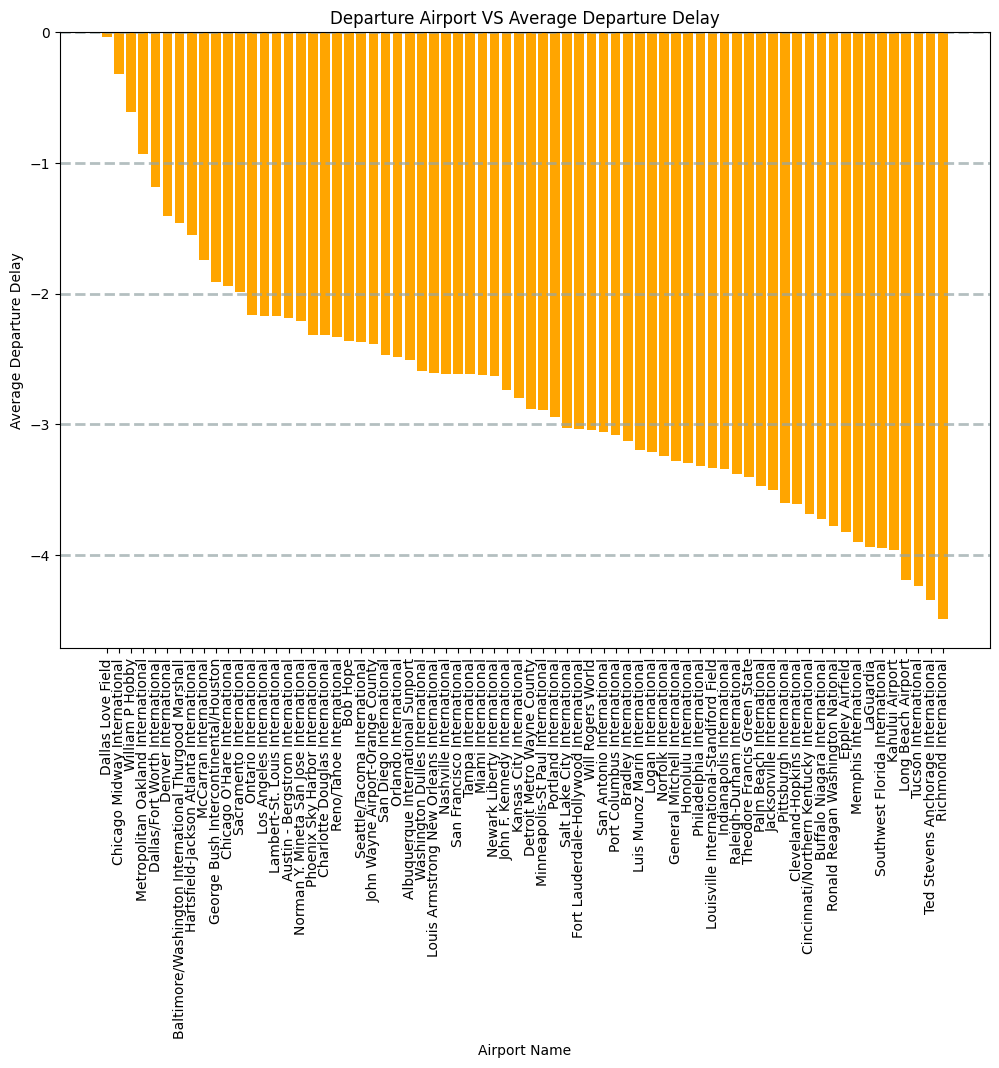

In [49]:
# Create a bar plot of OriginAirportName vs DepDelay
fig = plt.figure(figsize=(12,8))
plt.bar(x=mean_departure_airport_group.OriginAirportName, height =mean_departure_airport_group.DepDelay, color = 'orange')
plt.title('Departure Airport VS Average Departure Delay')
plt.xlabel('Airport Name')
plt.ylabel('Average Departure Delay')
plt.grid(color= '#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

plt.show()